In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


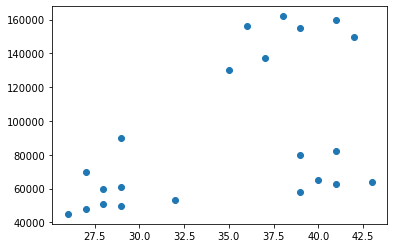

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
# n_clusters is used to assign no. of clusters for datasets
km = KMeans(n_clusters=3)

In [6]:
y_pre = km.fit_predict(df[['Age','Income($)']])

In [7]:
y_pre

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [8]:
df['cluster'] = y_pre
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


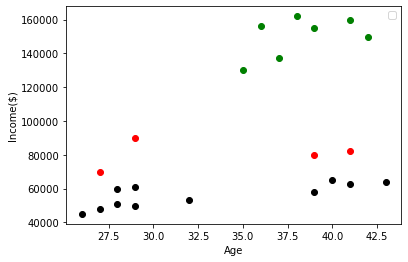

In [11]:
df1  = df[df.cluster == 0]
df2  = df[df.cluster == 1]
df3  = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color = 'red')
plt.scatter(df2.Age,df2['Income($)'],color = 'green')
plt.scatter(df3.Age,df3['Income($)'], color = 'black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [20]:
# here we can see that their is problem with the black and red clusters ,  they are not grouped correctly
# This problem happens because our  scaling is not right
# our range of y axis is 120k but in x axis it is hardly 20 , so when u dont scale ur features properly u may get into 
#this problem
# thats why we need to do some preprocessing and use MinMaxScalar to scale this two features . 
# then only we can run our algorithm
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])

In [21]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [23]:
# next step is to use kmeans algorithm to train and test scaled dataset.
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [31]:
# cluster_centres is basically used to get centroids
km.cluster_centers_ 

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [24]:
df['new_cluster'] = y_pred

In [25]:
df

,Name,Age,Income($),cluster,new_cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,0
3,Ismail,0.117647,0.128205,2,0
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1


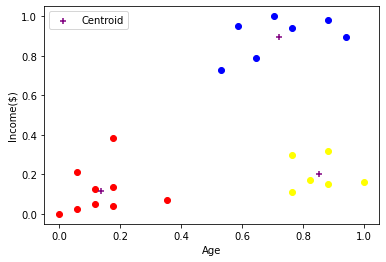

In [32]:
df4 = df[df.new_cluster==0]
df5 = df[df.new_cluster==1]
df6 = df[df.new_cluster==2]

plt.scatter(df4.Age,df4['Income($)'],color = 'red')
plt.scatter(df5.Age,df5['Income($)'],color = 'blue')
plt.scatter(df6.Age,df6['Income($)'],color = 'yellow')

# In this graph to locate centroids , for better visualization 
plt.scatter(km.cluster_centers_[ : , 0],km.cluster_centers_[ : ,1],color = 'purple',marker = '+',label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [33]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\chait\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.2105547899547249,
 0.17310821424993492,
 0.1326541982724516,
 0.1107356952741864]

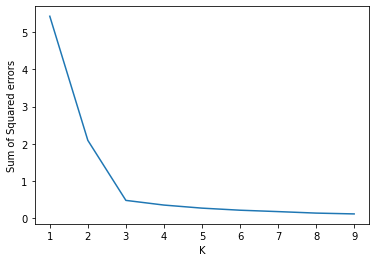

In [35]:
# we are trying to get elbow plot.
plt.xlabel('K')
plt.ylabel('Sum of Squared errors')
plt.plot(k_rng,sse)